# Single-Atom Lasing

Single Atom Lasing is a new approach to generate laser light, where a single atom or molecule serves as the light source. Unlike traditional lasers, which rely on many atoms to produce light, single atom lasers utilize the quantum mechanical properties of an individual atom to produce a highly coherent and monochromatic light.

-----


This method has the potential to be more energy-efficient, have a wider range of wavelengths, and have more precise control over the laser light. However, it remains a challenging field of research, as it requires very precise conditions for the atom to be able to produce laser light.

In [1]:
from numpy import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# install qutip and make it available
%pip install qutip
from qutip import *

from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.7/16.7 MB 25.6 MB/s eta 0:00:00


## Introduction and Model

Consider a single atom coupled to a single cavity mode, as illustrated in the figure below. If there atom excitation rate $\Gamma$
 exceeds the relaxation rate, a population inversion can occur in the atom, and if coupled to the cavity the atom can then act as a photon pump on the cavity.


 ![](data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAfQAAAC+CAYAAADDYv00AAAABmJLR0QA/wD/AP+gvaeTAAAACXBI%0AWXMAABM6AAATOgEie3dsAAAAB3RJTUUH3AsOBi0IFFueuQAAIABJREFUeNrsnXl8VOX1/9/nzkz2%0AEEgggbCFVUB2wRUVl+KKa12rfm3dd21r61qrtbV1q1vdW+v2c8WvfrUudUMBQQSUHWQngQRCyL5M%0AZuae3x9zbxxjAgmZhMnk+bxe8wqE4d773PM853POec45jwC3s/fhBx4HqjAwMDDYu/gzcIuI7LUH%0AUFWAqcAXRhwGLYUAOmLECLp3775XJu2yZcuorq5eBYw04jAwMIgBHAp8/Mc//jFx0KBB2LbdoTdP%0ATEzkggsuIBgMGkI3aBW8AGeffTaTJ0/u8JuXlJToDTfcINXV1X83ojAwMIgRLAO2bd68ecDFF19M%0AfX19h948OTkZy7KMFAxaDcv1lG3b7vDPpk2bpKSkBOCfRhQGBgYxglLg648//piamhrzNgw6F6Hv%0ADXg8Hr788kuA/wVCRhQGBgYxhMdKSkpYtWqVOvvZBgaG0HeFmTNnAjxvxGBgYBBj+LKmpqZi0aJF%0AsjeT4wwMYp7QPR4Pc+bMIRAIbAcWGzEYGBjEopf+3nvv4fF4MF66gSH0ZuD1enn77bcB1gKbjRgM%0ADAxiEC8sWLCAyspKjJduYAi9GRQWFrJu3TqAdwDbiMHAwCAGUQSseO655zQxMdF46QaG0JvCihUr%0A3FIQk91uYGAQqygHFv7rX/8Sy7KMl25gCL0xVJVFixZh2/Y8oMSIwMDAIIbxenl5OV9//bVxzw0M%0AoTcmc1XVBQsWAPzVvH4DA4MYx3u2bTNr1iyT7W5gCP1HN7MsCgsLpbS0tAb43Lx+AwODToBXFy1a%0ARCAQMG/CwBC6i4SEBD744AOABYQPZDEwMDCIdTyxePFi6uvrTZMZA0PokR76J598oobQDQwMOhHm%0A7Ny5s3bz5s1ieqwbGEJ3sGrVKqqrqxWYaV69gYFBJ4ECM1999VVM+ZqBIXRARFi4cCGE68732v65%0AavjTaTSJts93Y21cth3+nfuzMexO2K1gV/LojJzQWAaR8rLtzimjlg4dmPX666/j8/lM+ZpBzMLb%0AUTcKhUIsW7YMYD5QFS0FExkBs22yRBgE9FYlVQQF/KqUAkUibBAhEKmcYjWCpgoi4Y/z9xxgINAd%0ASCR8oE0l4dK/AhEqIr5LrOqcxuOybQYAg0XIBboB4sisBNiuykbLotCVU2OZx+r4wkZswzOniZCk%0Aii1CtQj+zsQJ7ju3LLBtLGCIs84GiNAdsESoV6VEle3AJmCtCMFYn4+7GLOIkOx457UizKyrq/PP%0Anz8/cdSoUcZLN+jahF5dXa2bN28W4IloK05VTgd+DmQAXlW8Iu7RsKhDfkGg3rZZLsIrIiyJRWXj%0ARhBEwLZJFuEi4DBV0kTwAZZqg5NgO2MLqLJDlTcti/ec/xtzxGfbDePyABeIcKoqPsAHeCJIUAhX%0AOQZFCDgG2Tuq/K9lEYhlY0ykwfueChyuykQRPISDVDgnFdcB3wIzLYuvOgOZ2zYJIvxKlemOrHyq%0AeABttH5sVQLOWvvSWWtbYpXYG+mR4aocIcIUx3B2n9besQN/nz5YH3zwgY4ZM0aCwaBhD4PY0z+A%0A3nHHHUyaNKldb5Sfn8+VV14JkAAE2rr4HG/8GFXOFSFTFb+jXHanMjyOh7uJ8Elv34iwfW8rnEaK%0AZTBwiiqnOIZJwPEUmns6Jbx9kuAQ/BuqfAistSzsvUnukfe2bXoBp4hwJpCi2uCp7uqtu+NOAOqB%0At4D3RVgXCx67e3/HEBsuwjTgLFV8ItQ78oiUnftnr0OK1cAnwAfAasuiNlZI3JmLvVQ53ZGZK4MW%0AycwxrL3ALOA1YIljoP0ogrGXx9dXlYNFOA/IJZysG3SiKRKxNkP77cd+tr1f9zfffI32TI5LTk5m%0A4MCB1NfXTwW+MDRlEFMeutfrZe7cuQBf7SmZRyoAVc5S5Uygl6Mw65zF1xIVEQKqgWxVbhJhu23z%0AuWXxmOtddbSicT1Xx+O5CTgUSHGeNdQCBSqOEq1z/vxzEU4AVqnymAhr9tYEiyDz/xHhVCATCDlk%0A3pI37SpVvwiiyhkinKjKEuAxETbtLQMswiPPceQ2wtnqCTpbO9KE7Nw/B4GAY7AdCxwFbFXlbRHe%0A2pvGSoTMfukYlT0cmdW3RmZOyD2oygHAZGCjKs+J8OXe9shVSVDlRlUOcLYN3C0s99kbj1N++Uu2%0A3nZbQfft27dr7969zUa6QcyhQ9SFz+fj008/xfFCWk12EYuxnyrPA9e4SqYFHl6zBOgonB4inKnK%0AZ6pMUQ0bOR2R4OPeQwTLtjlElU+Aaa6nvQeGhUQYLT5gLPCSbXOLKt070kCJkNlA2+b/iXAx4T3y%0AUDMKc3fGnKtoQ45nOwn4f6pcokpaR8oswujzqXIuMEOV8UCi83wtnZMNIV0nctQf+I1t86oqY9xt%0Ao440UCJk9rIIvxIhfU9lFiE7WwQVIQ/4iyr32DZZHZlEF3EvS5WDgHdEmCZC2u6MZlfHXH0128rL%0At1FUVGTI3KBrErqIUFhYyNatW+uBeXsSGrNtLFUuBZ5SJY9w2C9ai0pUCTrX+4sI99k2/Z37tqsC%0AdUK1uarc7dzbJeNojM31bKtFOA54VpXzVclqT/KLkJnPtrkKeAro60RmJIrTCmceXAg8Zdtkt7fM%0AXO/V8fAmAE8CVzqetu4p4TWCn3BS52PAn5x93bHuu22P8UXkNnhVG2TWz9kLj5rMnJ8BVaaI8III%0AYzrCEIuYk9nAPcD9QFJr1ppq2AnYd1/KZs78Eq+3w9KPDAxih9Aty3IPNqgAVrXGmnYIL0uE54Fz%0AVEkWwY6ikqGR5xECxovwiCpnuXuj7aF0HAV6OPCcCAe10rNr7diCqvQETgdeU2Va5NiikbAbKTPb%0Apo8ILxFOVExoD5lFoB7IFeEO2w4bK9GWVyPv1aPK9cDDqgyiZXvKrTVW1JkPB6vytCr/UOVqkR/t%0A/UZVZqphman+ILMoGShNzcmgKimqXO6s76iNqXEkJWJ8x4vwJrC/k2/TKpm5XvrRR7Pz008/x+v1%0Amkx3g65J6N98840AO4GClnpBqnRT5ZfAW6oMgKh5QC1R4JYqv1blOeBo20baupfZKAw9VJW7RLhX%0AlYT2IPJdwAvcqcrjwNSIPcU2KVTX+FLlcuANoLdTNigdIC83Ie0N4FeqZEWWubX12hGJmJMd7/UM%0AJwNf2nF87haD7ezHnwO8qcrpqnSLBgk6xldPVa4AXlelD3SMzBwMc8Z0cSSxt1VmrkfuGM1DVPkz%0AcIsTiWuTHpk6lYrlyxdTX19v6tENuh6hV1dXk5+fD/BZK7ygk4FXVbkAsB1vpcNWj1MnXaNKnio3%0Ai/CGKlP31PuLCK9bqtxCuHTvUKDaIb2OhAK1wEhVbgNesW2OjKwNb+mYGhkp56ryMnCWQ0AdLbOg%0AU853viov2TaXRhgabZoLqiTZNveJ8BdVhkCLE/qiRexCOBSfpcpVqrygymVuqLylxN44ZG/bnO9E%0AUs50DJRQB46LiKjUL4CXVLkkwtDYYwMsIopxLfCoKocQ3hZpkwGmiuTl4fd4CMyaNQuPx2MYxCCm%0A0K4bQapKcXGxVlZWCjBjF4rGo0ov22aSUz4ygHDGtkYotA5HRMJdFvA3VTar8iqwyLYptCzqWqBE%0Afc4++VHA2UAyP2T67y0T3/X+LKA3cI8qWx0vbYEI20So2M01koGeTiLhOUCWCH7VBg9IOlhO7k8V%0AIRG4QJXTgJdV+UKVrW6jk0gvrrm/OwQ5UJXDVLnM2TYI7mESZjRlJkCGKucD56nyDvApsEWVkgiS%0AbOo9pTtRlMOAs4DuTvXAXpOZEwFRwqWk/2PbnOoYGbNU2eK892Zl1oQh2kuV8apc48zJekePROWZ%0ABw/Gn51N4KOPPvIeeeSREgqFDIsYdA1CB9ixo0QqKytRJZ1w1nUl4T3dbiL0A/YHBqjSyyHOhpKm%0AvRnRigi1uk9RTbhM7joRqoBttk2+CItUWS/CVlXqAI8IWaqMAiYR7qbVx2kMEyS6yWHRIolqwo00%0ArhShBthh2+wQ4XtVNotQCtQ7JVm5wHhVskXoqUq6yN6VWaNSQzcZMOAQ+6UinKNKkSpfq/KVZbG0%0A8RZKRIi+nwiTnQYjg0Xoxu77AOwNY9NNDD0JONEh81JVtqqyESgRoU6VFBFygFFApghZQKoTQenI%0ASMNuZeZ40cnAFY7XvlWVr4BZIqxtTmaqJDsNfI4BRqnSyzEE/NGWWbduBIcOpeaLL75MMXvoBl2K%0A0C3LYvXqNQwZQiVwndNswyURxel0FtHEIRhpve9lhdkU+bnJSsmE27AOAo5wPF2rkZfo1pDbhBOd%0AgnvZK98tsTvvPwHo4xK3My6JGJtNuKROnXG1qaSpnWQV+bsgkOSUTA0R4QKn3n8zsAGocb6XSbiO%0APN0ZnyuvUIzKLTKRExEygR6qDBVhahMyiwxi7/Ux7WaNB501NkSVfUS4RJUQsBpY7xjX6ox3JDDQ%0AmYduQxi7Pcc3bRo777mnvOfmzZvp3bu3YRGDrkPo3367mJ/9jJIIEmhqcXfG7BJxxhPcjZLqlGNz%0AfkYqx5gdVwuaAUXWe/udEqRsEXpHtNF1WwR35mN93TkZ83HglsrMif64CYjDVNkncr05RF7XgbpE%0Afv5zdt5+ey3r16/XnJwcMclxBrGCdk2KsyyLZcsWc9JJ7OykxGbQKVis1aTnRohcTzwY4ekaxJjM%0AIkjadrrwBSPk1qFxb1VkxAgqfb764Jo1aw2ZG3QNQrcsizVr1iBiB/LyGrwiAwMDg85uiFhHH82O%0Ab7751rwQg65B6F6vl1mzZtG/P/7s7Ibs4E4Dk+9iZGVgZNac3jztNHZ8880iZyxmAhrEOaF7PB7m%0Azp1LXh51WVl0urMGTSTNyMrAyKwZY0SOPpqK4uJ8amtrTYMZg/gn9LKyMgoLt7H//lQA2gkXrYGR%0AlYGRWZNIScFOT6d27ty5pq+7QfwTekFBAcGgzUEHUUEnTIgzRreRlYGRWXPPnppKaMAA/LNmzVJD%0A6F3H+OzIEwJjitC3bNmiYHPUUbvtOGZgYDx0I7NOhdRU7EGDqPvyyy8lISHB7KPHufHpHj8d64Zo%0AuxF6fv4WSU+3AxkZnbOu16xPAwODXWHffanesGEDZWVlZh89/g3QQar8j3uQVZcidNu22bSpgIMO%0AopSITmOdzSozMLIyMDJrDhMnUgWwatUqI9D4R70qF6kyOZbnbrsQeigUYvPmAo44ovM2lDEeupGV%0AgZHZrnDAAVQ7hK7GQ+8SRmgdcL1ztHfXIHRVRVXZsqWAE0+krLMSulmfRlYGRma7wsCB1CQlEVq5%0AcpWZgV1nvg4ELorV+Rt1Qrcsix07dgD1oYEDqTcd4gyMt2cQbzJz9drkyZSuW7eRQCBghNo1EABO%0At21O7hKE7vF4WLx4MQMHUuP1op3BEneUixKlpk+R1zPz33h7BvEnM7cF7FFHUbppUwF+v98Iteug%0AXoRLVekPsVXKFnVC93q9fPvttwwbRo3P16kIzY4WAUccDWu8R+PtGcSvzOTkk9m5YcMW/H6/mtK1%0ArmOPqpIKXBtrxqkV3UWqeL1evvvuO/bZh1qvt3MQugjBQw9l/FNPkeMKpy1rs64Oa/Jk9svPJ6G5%0AI2MNDAw6P8aNoxYqtaqq2py81oUMUEevH2zbnCcSO156VAldRCgpKaG2tlZHjKCmMwlswwZSiovx%0ARQisDVEKtFs3AjfcwCAgZAz3djfIDIzM9sowAHr1onb58uV4PB4j2K41X/3AZarsa1mx8ZxRJ/T8%0A/HwAHTSoczWUsawf7/e3hYS9XvSMM9j+1lv0qavDZ7z0jrWeDYzMOhJ5edQuXbrUEHoXm6/O74LA%0ADar4YsFLjzqhFxQU4PHA0KHUdWUP4txzKUlMxL7vPvqY5WC8PYP4ldmQIdQuW7bcHNLSxearCOI4%0Aa6OAX8WClx71R8jPz1fLQvfZp3MTehutOenWjcApp1D0xhvk+P1YZkkYb88gPmU2fDi1S5cuwev1%0Amp7uXZDrgTrgPNvm6Ljz0PPzCyQnBz/hveMu6Tu5JS0PP8yGZcvotnYtiZgSNuPtGcSdzETQ/v3x%0Al5eXaXV1tenp3nVJPQBcZtv02psGa1QJ3e/3s3NnOWPHUunwe1f2QCQ7m/oJEyifMYNMM+cNDOIT%0A/fpRD9irVq3CskwwrsvaqEKOCFfHDaHX1dVRWlrJxIlhQu/khBwND0QuvZQtDz9MHibbPWZlZWBk%0A1hb070+9z4euXr3aeOhdeL6qElLlaNvmDMvaO6VsUffQy8oqOfDAzn8GelPrMqIDnA3YO3bg8fsR%0AIEQTIXVV5MgjqaisxPvuu2SJYJul0TGyMjAy6yjk5VGfmIi9atUqNR56152vIiCCX4TLVBm8N6ZC%0A1G6pqvj9fq2vr+TII6mKNw9dNbxfFgoh117L4JwcDj7tNEYdcgjjjj+e0cEg0kTzAYYNo3bSJMr+%0A+EcGYfbRjbdnEHcyS00lkJFBcOXKVWII3cxXVTzAr6HjvfSozT4RobKyUkSCoeRkgp09Ia6RRaa2%0ADc8/T8/kZA77/ntSli9nwZdf8u2CBSwYNYrqc85huAihpi51881sXrqUbitXkmrIx3h7BnElMwEY%0ANYqqrVuLqKurM8Lt2vPVLWWbpMoFHW3fRe12lmWxfv1GBg0Kd4iLlwXrhtmvv568Cy9kzGWXsfnD%0AD1nesycBVbyqeC+6iG3/+Q850HRIffp0SjIzqf/wQzJMkxnj7RnEncxk/HgqKyqqqajoPLuNtm3m%0AVjvNSwFqVPmVKgd15Nij1gnBsiw2btzI4MHUQNyUq6kI+txzZD/2GHmDB1P96KOsVQ2/N5ecV68m%0AefjwZhMBBZDrrmPziy/S54YbKHLC97ucVNEmfpEfPZvGyMKLSg6R8dCNh763MXo0NVVVtVRXV5OR%0AkRGTJOe+c9sGEXyApcpwYD9gMDBYlRwRvIDH0V3bgSLnsx5YCGwinDcUjMwLsm3oaI+08T1VsRxH%0AKxXYHxjhjG0QkAp4HP1dK0KRKoVAkQjLgG+BCtWGsbVtigu2KperskyEyt3p/Zgj9MLCIsaPJ67O%0AEdy+nYTLLmMkwIsvssIVlEuKb79N1h/+wKBHHmGtswiaWkzWuedSfMcdDN28mYQBA6jfjdGjzr9r%0Aey3qWFIwBgad3T4ZOZLamppaampi5wiLyDXmHCCSLsJ+qowHRgNDgBTC7UttwI4gaHf7MAvoqcpY%0AESyHM6qBAlU22TYrgSWWxTKXWB2DoV3Xtzs2956qDFFlIjBOhBFAP3dMER91nLSAM44BIgwkHKn+%0AuWPgbBchX5V1ts0yYKllUUi4znxPSH0IcAVwb0dEpaJK6Nu2bWPAgPggdHfCPP44OYEAnrQ0gp99%0ARsasWXTbuRPfwoWkL1pExoQJlL/zDssHDcK/K4+zd2+Co0dTcf/99H3kEdY1R/7u4rv3Xnr//veM%0A8Hg6LjO+o0otQiFkzBgqlizhm2jMQWMcdN71FS8YM4baUKiOmpoaZS9HKF2vNcIjnyLCWY63aolg%0ARZBLdaPoXVPOhUYQvd8ZX38R+gOHEC7JtYG5qvyfZbGoveTsXs8xULo5RHyS45F7InRwrSq6m7E1%0AGC/ud0VIV2WUCKNUOUEE27YpVWWxY9C09nkDwHRVVorwbqcgdFXFsiyKioro1y8+CF0kHBKeM4cM%0AgMGDqc7IIOjzoYMHU3faaew44ACqnEnh2V34uLwcz4YNpNx1FxtasuCnT6e0Z0+WWVbUzmiXQIBq%0An49U1R9fUwR27MD3+OP0u+UWNno87RuSV4VevQgSpRwOQ+adc33FkXEiSUkEIEBNTU00R6aRBN0c%0AcTd6Fg8w0LYZKsKhwKGqJAF+VUIuwUW8/9Y+b+PviyoeETzA4SL8zLapB+YC81RZY9tstSzK22rU%0AqdJdlTxVxgFTVRkN1ItQzw9RzR/pvNbox8Zz0yFwESFblWnQeufKuVZAlUttmwWOtx/bhC4i1NfX%0AY9sBzcwMZ7h39gWrCrW1SHk5PkD335/ya65hWxOT28NuuuKJoHPnkubzoSeeSNnuFpEqMnIkdSNH%0ARrUfvgBlQHd+Gsq3b7yRQevXk3bOOexMSWkyW7893rEVjXliPHTjoceCjdK9O/7i4h2J0bpgcjLe%0A2trm96Ujws25quwnwmRgGJAuQrrja6lIOK+pNQTXWmfB+WOQ8N6zV5WDRTjE8ZQrValSZTXwrQhL%0ARCjcnfxVSQBGqjJJhElALxEygAQnalDlOCfSjlERce4Vast9HHn8FvhNe879qBH6tm3bAOyMDELx%0AsFDdsI47lmHDGs53l2aUk7pk3PgYVhHsP/+ZAWefzdaWWMVul7loexERC+8nCXKPP84AgEceIeem%0Am9gSLbLtCC/NkLnx0GNhLH37UltQsDXRsizsNu5dBQIwYwb/OOEEykTYDmwDap2olqVKogi5QE/C%0Ae98hh1Bd4rHbS5e08J2oo1sSRUgEeoowGJhOOKLpUaVKhCKg2NGTluPxZ4rQF0gCQiIEVQk6xCqR%0AnnJ7GSnRfh2q2CJMUeVsEV5trxtFKeQpFBUV4fNhd+/eMd5dRyA5GbtXr/AWQnJy8+EWEewvvyTt%0A7bfp0Tg7XQTdsIHkb76hxymnUBKL9fmvvkqvmpqwcXfffQxyFESnKSwyZWud00OPNxulXz/8W7Zs%0AiVp4MhSiVoQ6VTKAfYDxwFjCCW3DgGSgWpUaCPeTZy/v3+9GrrbznLVApbOt2YdwIts4YIwqo0Xo%0A4xgmVYRPMgs6zlWnNQOdZ68GLrZtRsc8oRcWFpKYiN2jB8F4WqWHHUY5IGvWkNzEhFVAlywh5dxz%0AGX3CCZQ1NcfvuIMBvXvjP/LI8CSONTz3HL3dZ925k4T33iPLeHsGRmatQ14etQUFW6J+QItjXP8o%0AYzuyXCyWiK41DViaGltkBRHE3Wmd7hbt1ar42sOwjcrMcxPikpKwe/SIHw8d4He/o3DcOMpmzKB3%0AXR2WM+FsILRtG74bb2TgzTcz6OuvWeTzoY098NJSfO+9R/all5JPjLV+VYUtW0hYsiS83+YuoGee%0AoY+hHAOD1inrvDzqtmzZag5oMdil2gXGAZe3x8WjtodeVFSkDqEH48GyciwncRLaFp94IqOGDmX/%0Aq64iPxCATz4hc8sWku+8k/X33stmkTCZN94/nzOHtNJSEu68k/xYey8i6LffklJUFI4+uI/97bd0%0A27oVX25u54i2mKS4zrm+4k1mQ4fibw8P3cg1vsbkbKOcrspyET6LSUIvLCySjAxCjvfq6fTmdkRZ%0AR3Iy9qefsnjpUtJmzyY9IQF96CHWOcfEWqoN5Q2NJ4G++CLZZ5wRToaLpex/N1nv/vvp33jo+fmk%0ALFlCSm5ueLuhE8nKoPOtr3hR+tKrFwG/vxLtwkkd8bgWozwmd6vB7SK3SKTJrdq9R+jBYJCysnIm%0ATqQujhZogyCdMLp3zBhqx4yhNuJrzdafu1meM2bQ5/PPWQSxFYkTQUtLSfjiC3o29e+PP07fY4+l%0A1KkxNV6BgZHZbpR+Skp4K664uNiTkZHRpYndoEV+cI4qNwK3Rms9RCU25Pf7CQRC5OQ0dBGKK6ss%0AonxNGn92dW76/feTm5ODf9QoamPwvejtt//EO2/Au++S45C5diZZGRhPbm8hMTGc4FVSUmL20Q1a%0AYtSGRDhKlVOcznexQej19fWEQiGysvao3208KisFuP9+8n72M3ZkZcXeXrTfj+ftt8lpbq4B3Hor%0A/ekEZ7gbR6hzeuhxSOh2QgK6Y8eOLkvoZi22iicEqAEutW3yYspDDwZtevY0hO7iww/pvm0biddf%0A39BMJqbW3cyZpO/YQYL7d3eLwPkpAM8/Ty5mD93AyKzFHnpCAvbOnTu7LKGbtdj6VwakiHBd5Gl4%0Ae4qo7KG7HnqvXp2X0FWjZ12qIq+9Rq+RI6kcP54KVXyxNtH/93/De+fHHsv2/fajIhhEHn+cAX/4%0AA+vWrSN57ly6L11Kt08+odtRR8Vm/Xw8eznmfXdODz0x0YTcDVq93m0RDlLlYhGebcvUiRqhB4M2%0A2dkE6KR76D4fts/3Q3i5LUrV70c++4ysxx9nNVE80S6a8HqxN25kbs+eBL1edM4c0p59ln5XXsm2%0AlBRsvx9r0SJSFi8m5eijqYhluXZmAoxoG+x+3FCc7GFVhDb6KW5vhNZeK7KlsWuoRus9x6PRkpiI%0AuoTeVUvXTNnankU1VKkV4WzbZqkIX+9VQvf7/YRCIXJyOm2XOM+bb7I8N/eHCENbBJiYiP7f/7F0%0A3DhqYvGgGlXkscdYR3jLRRpPXkASEtCDDqLqoIOo7Ii+7m1dEJ1USdiFhSS88QZZn35Kj4ICkurr%0AsbKyqB8/nsqrr6Zo2DBqd/f+XeItKcH7wQdkzJpFRlERiV4v2r8/daecws6pU6loCbFHkvjs2aQv%0AX05yaSnerCyCEydSPWkSVUThMIw4DbnbiYloV/bQTdnaHt5CGk7Ku8I5qrWuuVP2doWoJcWBTZ8+%0AnTPkropMnEhN794E3LB7W8LvIui4ceHDXGJ4gnt21VfePT42WnOkvcmxM3rl775Lj5/9jLHp6YQe%0Ae4x18+fz3bJlLPzf/2Xl8cdTeuKJjH7tNbKcgzd0V4bBBx+QcdhhjNu0iaSrrqLoiSdY9/e/s/7c%0Ac9nx2GPkXnghQ0UIOg2QdmlkLFpEyvDhTHrqKfr06EHw4IOpTEkhdPvt5B1zDKNtG2nrFlU8Jk8l%0AJf3goZuQu8GeGA4iDHFK2faIO6IVclcISaSH2wktsB95L21cj9IJxrvbMUbpXRivoOnn1QceoP/c%0AuXzXrRuhiEiOZGYSOuYYylesYOG4cUxcv56k3/+eQsv6oRuhaxTYNnLfffR98UX6ONcKuh69KvTv%0AT+DNN1l56aUMmTKFCW+/zYqePX98xLF7rWAQeeQRcp96in7//S9L8vLCp3s539XzzmP7ww/T99BD%0AGfPmm6zq04f6xvPdvVYohLjeRTN9GuIOHg8LSGJnAAAgAElEQVSalIRdUlKiYhjdYM8QEOE4VeaL%0A8FFrvfRoZbkL2Hi9JsvdwHjoLXleVayZM1nSiMx/FDXyeNClS1lUUEDScccxyrYR9/AKEUJ+P9bx%0AxzOquhrP8uUsdK5lRRpirpHw9NOsveEG8o87jtFLlpAS4fWrc005/nj2LS/Hu2wZC/Ly8DshwAZD%0AQxXvdddReNddbDzpJEa98QaZ8IPHHxGulzPPZB+/P2wIdBUPHdDUVOwdO0rElK0ZtMEZrHO6yPVs%0A7TSKEqHXI6JuUo+xTA32qofuNvbZ1WdvKp4Iov1Jy+Cmokb/+Afrzj6b7bm5HPjQQ/SZM4f0O+5g%0AQHY2B//qVxT96U/kO9sjzfGIAJ7TT6f0jTdYecQRTPjLX+hXU4Pl92O9/jpZmZkcfOGFFN51F/k+%0An/MI8tNnUsU68kgqv/iCJXfdRd6TT9Lb8chRhaVLSR48mMnTp1OSlITd3LZOvPJdZiaBkhJTtmbQ%0AZlLPBH7T2lK2qITca2vryMjovBnuBp3fK3Amvuu9uoalVV2Np6oKy7YhNRU7PR1bhFDEdxoSvGIx%0AgdEl0V/+ku0nnEDZP/5Bzgsv0GvoUGqLivgqOZkQLWwrrIrk5eEvKWH2rbcy4Jxz2EcE+vTBv2oV%0A87OzqYddJ+C5/5aSgr1wId9ddx15J57IyB49CNbVYQUCyGuvsXzy5PA5B11NwffoQSAYDFBXV2cW%0ApkFbEFLlSFV+IcLLLV1HUSH0qqoqunWLr3C7qQWObdk45NLQDGfBAlI/+YTshQtJX7yY9M2bSVEF%0A20ZsO0zYloWKhH9mZ+MfO5bKiROpOOwwKo4+mjK3XKyl5O6GmPe0LKy1pJ6dTeDOOylo9AwtJk03%0A0VEE/vxn8oPBcHKbW67ZmmupIgkJ2E88wfqqKjx+f3iLID0d2+NBnXB9s+8kXtdXSgq2bYcThbti%0A6ZopW4tqpKMGOM85wGVlhxF6IBAkMRE7noRoyDwmF5UCdnk5CQsWkPLpp3SfM4eMtWtJ83gIDRhA%0A3T77UH3FFRSMHk1tVhbBHj0IZmYStCwoLcVTWoq3tBTPqlUkL1lC6uzZdH/5ZfpUVOAbNIiayZMp%0AnzaNssmTqcrNpZ5m6sHdjPDHHqP3JZdQ7Mx/aef5KG2dp5HX8f6w+lttkEReJy0NOy2t0T9L11xf%0ACQnYoIRCoS5J6KZsLXq3dfRMMnC1Ktc4J7Tt8nmiQuihUBCfL74I3XjosUXkIoQWLyb99tsZOHs2%0Ambm51P3852z705/Y2K8fgdxcKpOTG+Zzk5JLTyc0YEA4M3vqVCpxSsGCQaytW/Ft3UrCvHmk/fWv%0ADFi5kvTRo6m4+WY2n3ACJTQ6Wc81Lu66iyGhEHLddRQZaZn1lZAQzs8IBoP4nGQEA4M2GBO2KuNU%0A+Q1w3+5yf6JiQgaDIdrbQzGWZtfT+YDW1CCzZ5M2ZQoTDjiAScnJhGbPZtGyZXzzxz9ScPjhVA4e%0AjD85GduZz26znJZ8LMDyesPlXQccQPX111M0dy7frl3L1xMmUPmLXzB6+HAOeOstMsvL8RDR0e2l%0Al8guLibhpZfoXVeHZTJ8zfry+bBVwx66gUFUlopQD0xXZYpl7bqSIEqEHiQhAaPODKLiuTmEaf/z%0An/SaOJGJV17J8DPPZHt+Pl+99hqrRo2i1i2pipYRGVnipYqnZ08Cjz7K+qIivrr9djY+9BB9x4xh%0A0h130A/Qqio8t9zCUEAWLKD78uUkd4ajZmNMznGHxMSwh95VCd0Yte1D6kAQuNq2Sd7VF6MScg8G%0AQ3EXco+5daLxXUEQEVqnogLP8cczdskSur3yCstOOIFSfuhJ/pNkqxZ4e9rEvWQ33qMAkpSEnn8+%0AO84/nx3ff0/iMccw7o03yKmpwZufT4pzbbnxRgZ99hlLaKKdrkHX8tBBCQaDRq4G0XyvAvQFfi/C%0AH9uZ0OMvKS7W+O799+n+/PPkJCZiJyVhW1aYpOrrw6VCjReVZaEJCahloTk51N96K4WJibFN5oDe%0AeCN5L7xA7plnUvT55yzz+X5oltKGw0XszZtJ2rqVhEmTqPZ6f1SP3qLM7vJyPEVFJJxzDkX33ceg%0AYBCLH/ou6Oef02vRItImTgy3/DXomnrX3UM3IXeDdkAAONa2+c6yeLtdCF1E3JC7SYprR0UxahS1%0AZ53F9uJiEu6+m0FbtoRDL6ecQuGFF7LN42koPWLnTnwLF5L66qvkFheT2KcPtVdcwfY+fWKXzEtL%0A8U6ezISMDAILFrCwf/9w8lpLCLcpWblZ6Js2kXjqqewbCCCHHELZZZfR/T//YVlFBdY775B5881s%0Aack9vF70//0/ej31FAMjvP4f/a9rr2Xo7NksNh56p1tfUUNiotlDN2g/HgBqgV+psgAoaLyGopTl%0AHiItLb72D2NJ2agigwbhHzQIP2CnpxM87zzGWhZ6wQVsO/lkdjYiEf2f/4FHHmH99OmMnjmTrNJS%0AvLFG6C7pfvghPS68kJHHHUfxc8/xPRFh65bIoRky16eeIufyy9n3kkvY/PTTrAEoKCBp//3Zr0cP%0A6lesoNt111GUkrLrhE5VJDUV+8knWXv33Wy+5hoGf/45Wdu2kRT5tSVL6Pbdd6SOG0etCT12nvUV%0ATYQ99K4bct+d4R4KhfsVNHWWQKShHItNnmJl3ajSHbhehN9CuIucWyEZlaS4QCA+y9ZiTPk1ZGZH%0ATvRgsOnsbdVwBve777K8Vy/8O3fG1rnsLpnfcw99Tz+dMU89xcrnnmON8+yyp7Jyrht66imyL7+c%0AfX/5S/Kffpq1znU9/fpRd8MNbFqxgm69euFPSdl9Q6RGyXLBV15h9fz5LHz0UVb06oXffe+Vlfie%0Af57sXZ1oZhB76yuacJv0GA/9J2tIH3+cnNGj2W/2bNJdAo8g89Arr5B1zTUM/vRTupkE012+yyBw%0AoG1zdeN/iwqhh0JBkpJM2VoMPr8AnHQS23fsiC1CF0EffJDce+5h8Lff8s3JJ1PqGCGyh81SGq67%0AahWpl1/OvllZ+B98kA2NrivuKWHHHksxrciUj3inVv/+BK6+mm3btzP7kUdYkZNDnceD/dhj4ZC8%0AUUhd00N3Q+7GQ/8xamqwnniCfmvWkFpS0qCLVARdtozkww9n/KWXMuqxx8g77TTGEs7qNmhm+QD1%0AIpyiygTL+qHXe9Tq0ONtDz2ehD9xIlUFBSTEmpO2di3JX3/NguHDqWtN29FdeXvBIPKb3zAIYOpU%0ASjIysCNDe4D90kvkAJxxBsV7ugYivfZrrqGooIB5//43yyZMoPwXv2A4hLs6GXQ9Dz3cctg2co34%0AXVERvsJCEi0LDjmESicKpzffzIDnnyf7/fdZceyxbAf49a/ZiFPNYrBLUvcA17utrYHoeW27KgMy%0A2KsLTPr3p/7TTxtKrGLluazHH2d9w/SRNs29BhQV4Zszhx6ATptGacQhLA1He37+OT2Tkwnuuy+1%0Abd2rc09N83rhvPMoOe88SoqK8Nk2HqcSQXanACPCjxIZaYhYuC1Wprs4rnRPxqnNKBLjoTeDUCj8%0Anrti29fm5CqCFhbiKykhsX9/anr2xA94Lr6YoYcdRvkFF7BDFXnjDVYDq139YPbQd7veVYTBItws%0Awl+iRugejwe/3xB6rC6wKVOo3G8/aoihLZHmepO3dY6vWEFyeTkJgB5/PGWNvzB/PumBADJoELU9%0AehCKstIQVejdO7wv3wISVRHs4mISXn6ZnitXkgrhIzhPOIHSKVOoaAURqwhq21jvvUfG6tUkJySg%0A48ZRPXUqFZEHs7TCMLDLyvBt24avTx8CzgFMlklYah5hPSh4PMbBjJxS//kPmQDnncfW+fPJuPde%0A+p5yCjvOO48dEeQt8W7wRVmHiioBEU5UZb4In0TFjPT5vPj9DXW5cRs66qzw+dBu3eI3BBwxLp0/%0AnzQIZxv360dt4+9+8QUZqpCXR22PHtHfp4tMYNyVUnI74t14I4PGjGGyx4PedBMFf/gD+UcdRdlt%0At5F3wQUMFyGouuv56F7rvvvIzc7moHfeIatvX+qTkwndfz/9Roxg8rZt+FqSrOcmK86dS9qYMUwe%0AN45Jv/oV+4waxeRDD2V8cTHeaCT9xetcrK8Py90Q+o/n5vvv0xNgxgxyfvMbBt9yC/nnnUexa4ia%0A7ak9J3XAD1xh23SPmodeXx9fHnqcWYgSz4fNRI7LjRSNGUNFYy9ZFfnmG9IAOfBAyvfyM9tnnMGI%0AjAyCRUXMxukrrwp9+1J/9NEsvvpqhkydyvgXXmD1gAHUN+EZK6CbNpF03XUM7taN4PbtzLWs8Bnp%0AAJdeStHMmXQ/6ijG/vWvrDvxxIaoRePZoIBu2EDSHXcwYP16Up58ktWHHEKZ+90ZM+h5+OGMu/FG%0ANv/yl2yn+fKiSPUsXWB9NSAQwBIxHnqEnBWwFi8mIy2N4MknU7xxI0lnnMHosjK8/fpRd801FJx/%0APjsSEsKdIg32CNkiXBMVD93r9VJfT1xtGhmLsVPKSqZMoRJg332pjPSSVcPe0+zZ4dDftGk/Dcd3%0AtK67/Xbyn32WdYRPcrMaefjWY4+x/vbb2TR9OqOXLCFFhJA7Vtfzeecdepx6Kvv++tcUvPgiayyr%0A4Sxy10DwTp1K5ccfs+S558i54QYG4iTsNboWL79Mr5NPZt+zzqJ4zhwWH3IIVar4VPECntNPp3Te%0APL7773/pceyx7BuhsH8ii3nzSAuFwoZkV1pffn84fOz1es3CdET9+uvhNXfwwey89142vP46q9at%0AY/78+SzMyqL+kkvY93e/Y0BkKRsRhyAZtMyWBKa1mYRVNS4J3ViKnU9WqsiYMdSkpxNYs6YhCVBx%0AwnoXX8yQwkKSLQv74IPDHvzefOyxY6ml+fC8qGIddRQV777LsqOPZvyzz9K7rAxPVRVWeTnWgw+S%0A+4c/MHj+fL47/PCGzGFpos+99O5NcMYMVhcUkHThhQyvrm5Yr1pTg/Wvf9Hr/vvpv3Qpi048kbLI%0Aa0VuI6SnY7/yCisPOYSK445jlNPfoOE9B4Pw+utkXnYZwwMBpLkkvXhdX+FIpfHQIynijTfoBXDU%0AUZQScSLikCH4P/iAFU70p7dL5iLod9+REpm9bbBLh0Ydo/uJqJiRXq+HCAVhYNDhHrpLPLm5BG69%0AlfU33cQ+r7xC9jnnUDJjBj2ef57e6enhPfMjjqDEsUVjOrnLTWQbMID6TZuYd/fd9L3oIoZAuNvW%0A2LFUzZvHd+EjO3c9Fvff3niDVU88Qe8zzmBEMIi4ZwJMnEjFrFkscQ2j5q7lPJP39tvJf/55ep12%0AGiNHjqT6kEMo37iRpM8+o8fw4dTMmsXipKTmnytOt4C0vj7soXdVQm9Crta8efTw+bAnTKCq8Xyo%0AqgqXpyUnE4qM+Jx/PiOXLmUhpo1yS/SEAMuBN6K0h+6l8QEhcTgxDaL7btuNUH//e7ZOnUr5TTcx%0A+JZbGHLkkZS8+SarzzuPYQBnn8126BxlMS6pJydj3303BU38u7Yie11E4Ior2H755WxXhdpaLKf1%0AbYuv5XrsF1xAyQUXUPL662R+8gkZAwbgf/NNVjnVA9oVs+HDUQkxIXcHy5eTXFGBt3t3AsOHU9d4%0APixZEj6TYtCghkON9OGHyT31VLbB7ss+DReggFeVP1sWgah56CbkbtCKd2vPmEFmejq2s5ftHo26%0AR++90f8RVTjgAKo//5zv3N8B+sEH4dDfWWdREm1F4RopxcV4e/UiGE0ycwm0meu1+D6NS4MsC1JT%0ACUU8a2ueWRxjg7POYsdZZ/3Qda+p0H9XWV9dPcs9Uq6qYUKvqsLbvz+VAwfip1Ejp4MPpgqge3eC%0AgNbW4nn0UfqtXcs3seKdx/hc9QF3WhYFqlHqFOf1NpStxZUXadB+a2T//ak+5hgmjh/PfrNmkS7S%0A4NXtkawiEmnsiGYyXudjrVxJWlUVviFDqEpODoeCo03mixaROngwB1VW4on11q8RSioqjXWgIRGv%0AxbXucUroltlD/yF6tHYtybaNnH56uAtc4zmQmEjob39j9Ucf0ev55+l19NGMefFFVroRJaMqd7uO%0A3lPlEzeKECVC9xAIxFcduvHQ23USSv/++KdPp2jxYjIOO4xJBx7IhA8/JKOiAguwoeXkLgK2jfzj%0AH+ScdRYj1q8nsTFxPPAAuQBnnME2jyd68nXJ/P336X7ooUx88klWpKeHvV4j6a63vkzI/cfr/MIL%0A2f73v7PyzjvZ3NjjdhqjWL/7HVs++ojvVq0i5ZFHWHvQQT/dazdo9GoVUWWnCE9b1g/rKUoh9/jb%0AQ+8syrAzTno3vHvNNWz56COy6+uxvv6azOOOI3PoUKp+8QsK//hH8h2PvUXnoc+bR+pvfsM+fj+e%0AY45h5+DB7HCbpCxYQNrzz9Nv1CgqbrmFLZHtYNsawREhdMcdDHjwQfL+8x++mzo1nG1ulFGLDKG4%0AQ13dD2VrXbFbSqRc3STV66+nkGZ6Fri64MADqTrwwHCpqXGoWqBChQTgJhFKo358akpKChUVGJO0%0AHdeJbUMgEO4V7R60ogrFxfjq67ECAXAOeOosWkSmTqVy8ODwHpqLtWtJvfNOhiUlcfjDD9OnrAyP%0AcxKl7spA8PnQxETsvDyqDz+cioqKcGnX22+Tedhh7Dd+POXLl7Ogrd6zG94XCZd7TZvGmKefpv/q%0A1XxtyNx46GVl+Dwei+TkZCNX51fsfitGIr+HyWzfpQpy3tPfRVgTSeZR89BTUpKpqMBn3nX7CfGV%0AV8h64AEGhELIkiVkOOQiV1/NyCefpG9SEna3bgQ+/pildJKTinw+7N/+ls0XX8xofshoFUD9fjzX%0AX8/I999n+0MPsX7EiJ9myEaS7P77U/3CCyyfPZtuDz1ErpvB7fWir7zC0pNPppTmO5u1RmEpEHrp%0AJbJvuolhxx1H8VtvsSot7UfJZQZd1EMvK8OTnp6O5XT46WoTwlQHdQiZr1Dl7abetbftAlQSExMI%0ABPA4f40LgcbYOOS44yifPJmVaWnYqamEkpPDzVJqa7Fqa7FqarCc9rudKTlRLrqIottuY0hREckR%0Ak1YsC335ZZacdRalLb3YySdTdtJJlEVGOp369IaTy9pyRKsIWlKC9/jjGb9sGelvvcWSadOo6Kol%0AWgZNe+g9e2Zh27aZEMZIibq+dPT7TZYVPgCqMdqs/EWExMREN2HeG+vZva3wxGJpQklmJsHhw6nL%0AzaU+I4NQQgK2c+hKKCeHwKBB+PfZh7pOlowlgOfhh1kT+bvDD2fHPffw/Q03MPzssxk+ezZpIoRo%0Aph1k45wCy/rhE9nlbE8WsnO/0PLlJF13HXkjRzJ57Fgqq6qYfcwxlLn78UZ3d971Fc1h+f1IZmZm%0Alz1tJB7lGiNjcifUTSKU23bTX4qKN5eQkCDgobg4fvbRY2k9NiKlXX4624JSRaZNo2zoUKoAHTGC%0AyrfeYuXvfsfWlSv5ZswYqqZPZ+zIkez/xRek00QGfLRl5RK5CKF160g6/HDGTZ7M5NpaPN99x4Jn%0AnmGdm7CH2e/r9OsrWvD7sfx+rK5M6AbtRuaiysfAV433zduD0AGLoqL42Uc3HlfHvefu3QmddFL4%0A9K7f/pZNmZkEAcnIwL7tNgrKypgzfTrFp5/O2NGjmXzXXfT77juSKyvDJW5tjAppxMeuq0NWrybx%0AiSfIOfBAJuy3H5P69sVfWMhXTz/Nmj59wk1jjFdu1lcThC5+P5KVlWUI3SCaZG6pUirCg24EsjlE%0AxaNOSEjAsjxs20bCmDE/PYPawGB3uO02tjzzDP0vuihM7K7Sd8rW9N572Xj77RTMn0/q22+Tddpp%0AjPb7sfbZh6pjj2XnqadSNHx4w75S4xC7RCyOnxB5cTFJM2aQ9d57ZC5bRnp9PZ4jjmDHrbeyafJk%0Aqnv3pt6xkD2GxKPnocfbu/T7kfr6ru2hm6S46Nu+hKOS14lQtyvvPKqE7vFYbN+Ojxjpv2vQqZSA%0A9OhB8MMP+a4xGTc+6evII6k86igqHn2UdStWkPrvf9Pr2Wfpe8stDPP50CFDqB4xguqRI6nJyqK+%0AZ0+CWVkEPB4oKcFbUoJ35058339P8sqVpK1dS2pVFd6cHPzTp7P9d79jxWGHUeFYxe5zWO3sVWpz%0A72UP7qlRuo7x0FtP6F0+5G7IPMqqMbx2n7As8ltiLEWV0ONpD92gY5WAKnLwwbvvEOV+F/CMGkXt%0Avfey6d572VBZib1iBT3Wrydx40YSt2whccsW0qqr8VRX41GFlBRCqanhz/Dh1E6bRungwdQNH44/%0AJ4c6x3CwnPPE2105uZnzgP3VV3T7/HMyKivxjBxJzdlnszMxkVBLGus0vlZlJb5580hNTsaeMoUq%0AJ6Gwxfv9EU1zbMc7cGE1OrfdeHKNPPSuHnI3HnpUydwrwlJV3mrpmosKAScmJuL1etixI3720M3E%0A3CuWfYs8ycg+5DjnhqenU3fAAVQfcMAPjWpcD7txGRvhhLfG8LjGREfI3SXgb78l5fzzGZmWRvDc%0AcykaPJi6mTPJ+O1vGf7006w89VRKd2fkuNcqLCThwgsZtmABGQcdRFl1NZ65c+lx3XVsvOce8lsy%0AtgjDQP/2N/q+/DK9t2whacAA6q66ivyLL2Zba4yDrgS/H6urh9yNkRJFlSj4gesti1BLnyFqSXEe%0Aj0VJiUmKM9jrsvpRxn9TZWzO+cF7tUJABL3xRgZeey1Dn36a1fPmsejaayk65xx2PPUUa9ev5+vH%0AH6fvVVcx2O8PN9tpzBFuNn59PXLjjQw8/XRGXnQRhSUlzHrvPZZ9/jnf1dXxRSiE/Oxn7Lt0KUmO%0Ax63NeOUK6N130/eggxi/bRu+F19k1ebNfP3MM6yeM4eMqVMZ9+WX4WqDiENxmr1WV1pf9fVIMGhC%0A7mZMbbchnPV1qwiB1hgUUSN0r9fDzp3x5aEbGFm1J449ltJPP2WZs9XgddajpYonPZ3QRx+xfPx4%0AKqdMYZxrBLhjdT3p7dvxTZjAhLw86r74giVnnslOwp0CPc415f772fTQQ6z/+c8Z/dZbZDZ+Z+61%0ANm8mYdAg9gf4739Z9uCDbBo3jprUVEKTJlH93HOsffJJ1lxxBcMfeIBc94S8powVN0LSnGzitWwN%0AsHr27Gk8dIO2kLmlymeWxfzWRgeiQuiJiYkkJPgoLCQBTGMZAyOrFhghctRRVPh8P21ME7n9cMkl%0AFF97LfkjRjBp7lzSnL72dl0d8vnndDvmGMY88wzfX3UVhc4BXw1Jhe51VJExY6hZsYKF99zDwH/+%0Ak17OYUpKePtBZ88mbfp0Rr/6Kituu438tDTspqIYI0ZQt3w537z7Lj1vvpm8yOu4nwULSN1vPybU%0A1jYf9YjD9aXV1WFCz8zMxG6u84eBwa7J3ANssyz+vCfrJCp76CJCdnZPtm7dkkgn3FtzSgFCjvKz%0AoqFs3JO+CIdKTblTO3vone39tiRnwP23Cy6geNw4ah54gL6XXUZ6YmKYbMePp+K111gxfDh1u5pj%0AbiKh14s9cyZL77yTvgceyLgpUyhNTsb++GOyRoyg+vXXWeF0G/Tsom++iGDNnMnS22+n/+TJTLjz%0ATjacdBJlK1eSdNNN5NXW4nnxRValpITPnW/qWvGYo7JtG77U1B6EQqEu26TA5B61TS0A1ar8ek/f%0AZVQI3bZtcnJyWLYMTzCI1dmOArYsQqefzqjTTqP4F79gZ5QUtv33v5O7fDkpzz7LOkwSkfHQ93yR%0Ay9ix1L7wAt8DUl6OJyMj3HzHCWvvlj9cAyIlBfvee9lcV0fBP/9Jr+pqPP/9L0t79iSgGi7Va4GR%0AIarwpz+x+bLL2HbBBQw/7zz2zc3Ff8cdrD/3XHbs7lrxKLMNG0jMze3TpcPthszb5J0DvGBZbNnT%0AdxkV6lVVcnJyWLgQq7QUb69eBDvby/z6azLGj6cymhft1w//7bcz9K672NynD0Ez2Q3aoijdJjsZ%0AGeFoEnuQyOcSclIS9lVXUeT+urWRKfd5+vWj/rPPWBKhkKxoRbk6mw7ZuJGkvn1zzf65QWujGuqc%0Abz5fhFfb5JxGk9Dr6pCyss5xdGcTXvqPOvBEYU3KGWdQ4vOF9xTj5dCaGF0QXcn7idzTbqvnb7H7%0As6pb8jwexznwQsvr5uMNmzeTlJvbp0vvn8ejXNt7TCKIKjtUuRHCW8AxQeh+P1ZnJfRmlFVbFaac%0Afz4Ff/0rA3HKfAxiUlYGRmZtVoNbtpiQuylba/28AUIi/NmtN7fawMpRJfRgEKu8PD4IPVpr8rTT%0AKJk3jx5FRSQaL914BQbxK7OtW0nKzc01Ge4GrSHzBOADEb6JRkJh1Ag9OzsbwKqoCLfZNFZZ+DIH%0AH0x1v37U3nILA8EQuvEKDOJQZgrozp0kZmf3MnvoBi2FB1grwgPRWhNRI3Sfz4eIV8rK8BpP9Ack%0AJBA691wK33mH7MpK0+veeHsGcSozL3gkJSXZyNWgpUZguSq3Qdv2zaNO6CKCbdtkZ+ewZQsJXWji%0Aagu8brnnHvJ37iTxk0/oZrx04+0ZxJ/Mli8nCZJITk7usjXoZi22ijssVV6xLAqgbfvmUSf0sIVh%0Ak5OTTX4+iV2ByJ0TrGwI/2yO4J1a3NApp1D45pv0MtPZwCD+1MKqVSSnpCSRkpJi3obBLueKCAmq%0AfGFZvBLti0eN0MOJcdls3RofhN7coRMi6PffkzRtGmOyspjSuzdT/vlPskXQ2lqsmhqsJk73sm6+%0AmfwZM+gNZoutI2RlYGTWkVi7lqSUlLCHbuRqxrSLawmwAfhL2BGOUUK3bZv+/fuxeTNJxEFYOTJ0%0AFOGV6y230H/0aPY/5BDKS0qYXVTE7I8/psc999A3JYXDr7ySwY1zCFSRYcPwZ2ZS/8wzZIuYErb2%0AkpWBkdne0PlLl5KalpZCenp6p3pu56dHlQRVFNgOrFVliSrzgFnAHFXmqDIXWAKsV2U7UAckqOJV%0A3fN+Bu05zQj3RkgAaoDNqqwCFgFzgMxqKgIAABllSURBVNnOz6+Ab4CVQL4qZc7/TwA8zumM0fLO%0AFXjEsvBD9ELtLqKWpGXbNnl5ebz+OnFhokaWELjnQ59wAvu+/z7ZL7zAsvPPp9g1iB54gI3jxjEJ%0AYORIappSXj16EDzmGHbccQdDLrmEoogjPA2iKCsDI7O9MY7ly0nr3j2NtLQ0AoFA7D92uJtfIhBU%0A5TPgSxG+V6VaBL8I9SI/7fhp23id/5fgfHqKMFmVA4DRztfc7ci9JWGP82z5wPuqfAMUi1AjQj0Q%0AcM7ZiBwXQKIICSIkqpIgwj6qHCDCAUAOhEm4DcZTMvAvEea318CjSug9e2ZRVdUQctfOTFiusnE8%0AaXn0UXLef5/s/fen7Pzzw72q3e/07Ys/MRHb58OeMIHq5npYX3klhf/+N/1nzqT71KnRbTNrvD0D%0AI7O9Mg4FZNMmko84YpBKbGbEubpYHDKvEGGjKm9ZFl82JrZdjcCyCAJBwoeIIMI2YDnwb0dfHgCc%0AC+SpkuFcq93ikU7bVLfroR8oAeYCb4mEE85aOC6c/+8HKp3vbwU+d+4zAfgb7PER4RawUIRn2tOY%0A9UZvYgsJCQkKKbJiRU3KqFHUxpHy0bvvZgggv/89mxorpO+/J7m6Gm9GBoGhQ6lrTliTJ1MxYgQV%0AL7xAzq4IPeKktlAUxyBAvbMYGy8w7dEj3Gs+NZWgY123+2u1bbzRCDkZD9146HsTxcX4/H5k2LBh%0AEmNNZVwiT3B0/RxVPhRhuUNWP5FFa9Zj421JERDha+Br26aPCKNVOdHxcENAIIqeuxJuM5wClKjy%0AHxHmqLLassLcoxr+NG7r3SL2tX4yX+vbMF+VcMj/r+0t8KjWRScmJkq3bunMnVuTNmoUNcRBSFkE%0A+8EH6VNcTKLPR+i009jhhHQahLVsGcnV1XgGDcI/eDD+ZsYtgPWHP7Dx1lsZUlWFxzlzukkD4vHH%0A6X3VVYzy+aJHrrtSoqpIKAQJCRzR3u80FELGj6d84UIWRGMOGjI3HvreREEBCX4/1rBhw6Kd8Sq7%0AIOnd/V4d8gyo8ibhU7wqXW812rJofA0RCkUoBD62bTJFOEmV40Xo7hzPazXjabdkvLbz+3zCIewv%0A2nuOteVaqvgI75sXtPfcjzah061bGgsWbEu76CK2xYkXYT/5JP0BTj2VIvjpcZWLF5MaDGIdfDCl%0AzS04N0P+o4/o0bcvdc6Z1s3isMOouPdeVnk80QlXiSD19dQkJJDiJL80OWk7IllPFendm3qimJRp%0AYLC3sGULCaEQMnTo0Ki1fbUsWLOGz4AKoJ/zyeSH0lg7gvTd0/JqVdkqwibCCV7LRFjU2KC3OmDV%0ARW5ZirCTcEj+37ZNP2CsKsNF6KdKXxH6Aomq2G6+Ej89hKgE2AKsUWUFsNglyBiHD/g/y+LtjohK%0ARZ3QMzLSWLaMdDp5prtLwICsWUMawBFHUEYTmZxz5tAd4PTT2dFcVEIEtW08L7xAv7//nVU+X/M5%0ABqrI6NHUjh4d1W0LAcqBjFiRTbSO2TQh9067vuICW7eSAGEP3e/3R+WaHg/ceCP/99vfMotwRNCj%0ASrf/397ZB1ddnXn885zc3LxASEgIEN4FAwTCSzsKWAFb2K2OVqftqpXVrsVpXd2+zXTHdto6be3a%0AVsfV1p3qtLbWt+5M39jVVSy4bpCRgjJC1dZSBeRdoAGFBEjIvff37B/3/OAaEwxwX343eT4zGQfM%0AXO75fc/vfM/znHOeA4wQoQ6o92ZxCGjza9l7/Ea2lK+T8a5nXYjnHf6bQXAi9b0b2K3K0z5SL1El%0AJsIIVYYBw/zEpVOVwyIcArYDR4CUKknnTo5f4edGtL8q6dKu9+freWfV0EtLSxk2rIbXXmPQ+6SH%0AIk8oXmfnyWe0YAHtme0JTX/9+rShX34575yqvT/8ISNjMXTpUlr78G9Lljtk5kREovSMo/I5RvFp%0AH4GJiezZQ7ymplbKysro7OzM6tktv5cmCAISztFJ+lhZ0T3r7qbrv1PK/3SRPpu97Ww/N0r91Y+5%0APxbhSL50cNnt3MqoUaP08GFKE4nirlsepp7Ly0lUVpIsLydVW0vSFwY4kY5fvpya9nZKzz8/nW4P%0A/393urpwv/kNIz7+cfYNGUKit98zzlwrwzQrBFu3Uj5tWhPJZDJnB7GdLU4VU39VVQYBPxbhpbxO%0AnLL9gaNHj5YgQLZsobwfRBACyCWX0NrZSYl/XzWMzA8dovQzn2E6wBVX0ErvhRV0925KN26k+p57%0A2A7ZSTUbFqGbZoVn2zbKm5qaSKVSJqz1V/U+sMo5luX70EMuInRSKXjzzX5T0909+CCbBw0iefvt%0AjAW6REi0tFB1441MamtLn0u87LJTptt12TJqm5poHzOGTovOLdozzfpPW3bupMIM3cigS5UfQf4z%0AK7HsvqRpQyddaKG/GLrU1JB69VXWL1rErEmTuPD4cUqmT6f97rt5c9kyGkaOpHPECBL0fpwkuPtu%0AJtxyC9tgQF/GZNGe0Z80U0B276a8qWmqGboBUK7Kbc6xtxAbP7O+zl1fX08sFmP79mS/uXVNFZk4%0AkePbt7OurY14ZSVBLEby0UcZoQrjxtFRW9t7EZiVK6ltbaXskks43FsVOcMwio+DB4mBi9XX1xME%0Agb3cAxR/jr4E+JVzrC7UKY6sp9xVlaamJtm8mYpUqnhTy2GVIXxBfVVEldiQIaRiMRQoWbOGIapI%0AUxNHy8t7PVce3HYbE2bM4PD06Ry19z03WhmmWSGasXIlQ+rqRhGPx9XMfOD2Vy/9TlUezPhzcRu6%0AiJBKpZg+vZk336QimSzuteLjx5GHH2bYihVUZxTzF1Xk+HFceFzthhvY11sn2LKFyo0bqb71VnZg%0Al7HkBBtHTbNCjfOrVlEzZkwD8XjceuHA7K9hcUAB7nSOo4X8nllfsk8mkzQ3N7N9OxWJRFFfzhJ8%0A73uMXrqUGZdeygf834U73FM//Sn1r7xC9c03s2PhQtp6+QxdtYqqQYNIXXll70VnDIv2TLOi/P66%0Abl3a0MvKykzUgdtfy4A7RfhzoUv5Z93QgyCgsfFc2too7+pK3+5TrCJu25Y+enfxxbQCmkggbW24%0A++6j4ctfZtp117H7/vvZGt4F3NML/+CDjLrpJnaBXZdq0Z7RXzQLq0hu2kTVxInjKSkpMVEHXn8N%0Aj6g9BzyTr6p1pyLrm+JUlVgspvF4jfzxj4cqFy/uOXqN4gys2yzM3X47O0XSl4ksWcLURALp6sIN%0AGkTqiSf44xVX9FwKNnzh9+0jvmEDNQ8+yBvZKnNq9KydPVvTLN+88QaVqkhjY6OqqvXAAdaFfYDW%0ABdzT/X71fmPoIoJzTsaMaeCZZw7VLF7M4WKITMvLCeLxd2cTJkzg+GOPsbmXAen9Iu7gzjsZPXky%0ARyZN4rgZjkV7Rv/SbONGKgEaGxtFbd1nwHVhoBz4oggHohCd58TQAZxzjB3bwNq1m6pJ3woU9cKF%0AJQ88wOsTJnC8B9HOdEByN93Evquv5oDfAW+2Yxj9iFdfTV/a1NjYaA9jIIXmeiLV/ki4bh6V0rw5%0AM/QxY0axbBlD4cRGsigLJB/5SHppIDwnfrbfWRWZMoXOzM80cqafRemmWd7ZtInKMWPGUF1dTXt7%0Au4k6QPqrv7d9vyq/iFo/ztm8YtSoBu3sdCWHD1PuN5BElsy67RmiZf0zjZzqZ5hmeaOzE7dzJ2Vz%0A5swhmUyaoAOkv/qVlQD4qnN0Ra0f58zQR44cKeB4/vl0WqoYZ2SGaWWYZj1x7Bhuzx7K5s6da4Y+%0AgPqrCE6V74uwM4p9OGeG3tDQQCzmeOml4jR0i/pMK8M0621wP3YMt39/OkK3Gu4Dp9sC60RYFdUl%0Ao5wZ+rBhw6isrGDjRqoo4rPohkV7hmnWbTKib71FKbjY+PHjzdAHxgTUAUeA74sQRHVCmtO9eTNn%0AztCtW6no7MSqLhgW7Rn9RTNdvpyhU6Y0+7ZYBxwAOFW+JEJbEET4S+bqg1OpFOeff77s3Uu8tTU3%0Au+kNwzAKkFnQZ5+ldtasZnsgA4AgABFecY5dqtE5olYIQ+eddyg7eJBYsaXYLI1rWhmmWQ+ZBQV0%0A7VpqZ82abkIOMKKejMmZoQdBQF1dHaWlg93rr0f/6FqxCWeYVqZZYfjrXxkEcRk/frxahbj+j3NF%0A9F1z98Kmr1Jtbm5ixYp0gRmLIAzTyihyzXT5coZWVJQzbtw4sfVzY0AYehilNzdPY82akxXjLIIw%0ATCujmDV77jlqqqoqGTt2rAlpDBxDV1XOPXciW7ZQ5YN2i6WMPnUdH8VJ5p8tQo9stK0Z48l7rhLu%0AT5oFAe611xg8c2azlpeXm/jGwDL0uro6FamkpYXqvI0v2rMBhINIXwaTiA44vbaryE2te/ZGVOkA%0ADgLJDGMv6lRtP5t4hJMuRBBVEqrsADYBu1Xp6qaZ9gfdduwgfvAgsQ9/+MNWIc6IHDk9TiYi1NbW%0ASnX1IJ566tjQRYtydpVqeDdtGfAO8BLwiiqbRNgDtIlAEBBXpVaECcBkYBowBRhB+l7bE7eiRSwl%0AKKqUibBDlVdE+JMqW0XYDxz3RQ+qgAZgoipTRWgEzvEDUpKI3faWcWNRuSp7RXgR2KDKa86xt4cJ%0AywQRJosw22s22ese1aoe6ifMpcDfVNkG7CN9qUOH/50hItQBI1QZJ8JoIOl/otymMmA3sA5YD/zJ%0AOQ73oPEQVRpF+IB/12YAFUAiwu0TVeIiHFVlmwhvifC2KseA4IUXaGprY85FF10kVlDGGFCGDjB0%0A6FBqa4fQ0tJaB2zL0QzaAV0i/ESV5SIc7Sm97xxdflDdB7ygSkyVShHmqPJZYJxI+grViJT2U1Vi%0AflLyY1U2Ah29fK924C1viqJKBTAa+IwIi+E9V8MWtF1+EnJMlTtEWAMczWxX5pWE/u+3A9uDgGdI%0A30M8WoRPq/JRPxmLGmXA34D7gPUidIj0bGRBQCkQV2WUCJ8CLvGTyyhNxEIzPwp8F3hRlaOZO4BD%0AzcL/itAGbAA2+DZWAVcA1/mJTqSidv+uIcLPVXlShCOqHHfuXd/zstLS0lvOPfdcOjo6zEGMSJGX%0ADfkzZjTrzp2Ud3RkbwIRRnhAQoTngCtE+LUIR/q6Vi9C0jnaRHjWOa4R4VZVtgKuwGYeDp6HRHhA%0AhCXO8Qegoy9HKERQ5zjmHJud45vAx4DVQBsFvJs+Q7MuYCVwuXOsVH23mfvJV88dNm0Unc6xVYTv%0AiHC1jxSjUr+pBNgFfFuET4jwrAhtvZm5b1NChKPOsVmE21X5e+BRH9mXFDgLcUIzVVb696wF3m3m%0AmZr1pJ0ICed42zkeFuEy4L9U09cLRySweRv4hQgLRXjIOQ74ftZ9LJk/d+5cgiiXCzPM0HNFEATM%0AnDlTjhzBbdpEtnaRqAhxH2l/SYTvOEenr+hzxojQIsLNwCM+6i9EBKHAYGCFKjeK8MswY3Am5yH9%0AMzkgwreArwK/9wNYvtumIpSpshv4vAg/ECF1Ju3K1FiE3c7xdeAPqpT2tn8iD5qF3KvKv4jwbKjb%0A6bTJP48OEX4O/LMI3wQeUKXMt03z3K4yVfYCX3DupGan+56Fv+/743HnuBdYIVKwSF3DDJgqv1Xl%0AZud4uA+aLbzgggts/dyIJDlPuQdBwOzZs0kkiP3lL1R+8IMc48zTiOEaF0CLc3wrfAFFslMAQJWE%0Ac/xOlYOqfEPkhPnlNGbPiF6TwLecY0XmwHKmE5XMZyLCPuAOVQ4A13aLwHLXNE2Xu1ZlhXP8Wziw%0A+2g7C30MVPkBUCbCgkJEsKq8A3zJOXafjW7dfv+wCM/7/rGTdKq7NNeaZfRFgP91ju9kvmdno1nY%0AH32A+wAwHFiUp774nqyDCLeJsPo0NPvQvHnz7EIWY2BG6KpKTU0NDQ2jZf36s75KtYR0iv3u0MzP%0ANirvacDxA9cq4HPA60A8l1GEKipCBbBVhC+EZp7ttL83Pnz09zVVDua4beonjceBO0Mzz3Y9ZOfA%0AOdQ5vg3cy8lNZbmM/MJouRJ4WoRrQzPPlm6ZUbsILwCfBV7z/2bONBOhRISECHd1N/Msa4ZfYvh3%0A0il9l+MMS6hZGfAqsFSE1acxhiwaOnQo9fX1ViHOGJiGLiIkEgnmz5/P889TcxYvIqRT7NeKsLyn%0ACDR73/lEBLldhJtU+Z0fBHI1gIoqT4jwORHeOJuI/P0GUR8pI8J6Ea5SZS25ScGr35y3W4RrRVh5%0AttmG95kUhZ/9BHAD6asOc2kQ4te3vybCXSJ05GojZYZmO0X4gio/9ZPbrGvmI9e3VPlHEX6fD82c%0A42lVlopwyI9JOdPMv8f/KcKXRXjrNCeX1zQ0NFBXV2cV4oyBaegAiUSCefPm8vLLJ86iax9feM14%0A8VcC14vQmo/JcRip+xf+R8AtwJuk1xSzNXiWAIeA/3COO/JVeCc0CFXUOb6qyl2q7Ce90/qssw0Z%0AWYenvGYHc61Zt2h2F+nd1E/6yVJWjV2VMmCzn4CtDvdH5XKMz1yDdo6HgK+osol0Cv5ssxGacVb8%0AaeB65ziQT82c4y0RPi7C4xljU7a+gfrn9DbwDRHuD9/t09TssokTJ1JVVWXOYQxcQ1dV6uuHqXOD%0AXUsLQ07T8FIi3OKPN3Xm8zhZ5nqhCGuBz6tyLyerYekZPg5VJa7Ka6Q3Pv13OFjni8w9B87xJHAj%0A8JjfbChnaIDq9xwkRPiKKnc7RyLbyyJ9jGZVlbv9hGKnb9dZmZ7/iYnwM+CLYTYln5c3ZBzl2+Cf%0A8XdVCc4iyxIejexS5V+Bu0ToKoRmnh+pcr0qO1WzshykpJeVnlPlehFWd3+3+8g5QPXChQst3W4M%0AbEMXESoqKmT8+FE8+ijDgaCXdyJM08aAYyIsV+ViETZ0n9UXAlU6nePXwCeA1aoc8ZOOvn4r8QNv%0Aqwj3OMfNIrR2H6wL0hEc7SL8BPikKmtFaPff9ZTlVzM2UMVUaQd+K8JHRXilUO3KmISFaepP+zR1%0Aq4/WJcOg+5Rx8JOcPcDXRXiICJzr97vFn3GOxar8mvS5d8l4r/UU0XjYF9v8cc+LnePlQmvmo/Vd%0AzvFpER5QpRVOTzNOVrFzPiq/X4RbRThyFpPmWUB84cKFYkfWjKgSy9c/VFFRwTnnjOWpp94YDrzp%0AC4sEYelIb4ylIuwEngRaRNgdRq5RuMIuY8Pc28C3VWlQZS7wSWCKCCnSG7JSnFyPdL5tMeBPwOPA%0A877oRlQK2JDxXfYD3wgCGoAPinCpKucDgQhJTp73PqGZr173pF+X3xsVzTKfq3M8FgQ86YsIXQPM%0ABDpUSfqlDukpQyRCpSq7RLgfWJPvLFEfNcM57lPll8BU4O9UWSxCFemqbEHG75b4LMoLqjwlwquZ%0AmhW6Xd1OZTwaBPwPME+EJaSrzXVwctNjT5o50oWHEn5CsMI5DmQhGJg9bNiw0kmTJtHe3m7OYQxs%0AQweYNq1JW1r+r3TdOp644AKGA/Xe2A8Df1WlxTk2h4NPFCLXU5mEKnud43HgcVXqgYuA84CxpM+S%0AJ1XZJ8LLwONhNJ6N42i5bpsIe/3mw+VBQEyEOcBMVepFKPXR+BsirBHhYJQ1y2jTIRGeAZ5RZTxw%0AtQgX+tSu88kkvAEGpOuSP+wcfw4NL8qaqXLYOV4EXgS+p8pYVWaLMNxXRDwKbFPlRec4VkSarQBW%0ABAGTgU8Bc0kXfyrJyEYEfiJ9APiVCE9nc54BnH/ppZeSSES1aq1h5NHQVZXm5mYB9EMfYjPww94i%0AjqgNmu8XTfjIpxX4nf85ZTRVDG3rtgkrCaz1P0Xbrm4b53YAdwF3BQH1IgwlXWc86SvX7RdJ11wP%0Asw1RNLzeolvf3l2kq9YVvWZegzfgRB2D0UCtKpXezI8Bf3Pu5BJWFjMpAsy9/PLL6erqwjAsQgca%0AGxuJx+PS1dW1EHjq/SKOYqGv37kY29bHUrNFqVeGUbfCSSPobghRN/Jc9tmITp5xjj3AnjxNViaU%0AlZXVTZ482Uq+GtF+T/IZoQdBwPz584X0rUul9viNKE9W7KhxcU5EcqDbNVOmTCEej5sAhhl6+iVL%0AF5i56KKLAJpJpzcNwzCizrVNTU1m6IYZeibJZJJZs2YBjAHq7PEbhhFxhohI0+zZs9Wqwxlm6O+N%0A1HXq1KkAS+zxG4YRcT7mnGPOnDnm5oYZejczR0RkxowZAEvt8RuGEXEurq6uprm52Z6EYYbek6lP%0AnTpVS0pKzgVGmASGYUSUwUDzlVdeqalUCiv5apih98CkSZPCDSZXmQSGYUSUWmDKkiVLpKurC1tD%0AN8zQe2DUqFFSX18PcLlJYBhGRPlAXV3doMbGRlKplD0Nwwy9O+F59EWLFikwCRhmMhiGEUH+adGi%0ARSQSCYvODTP0nhARkskkixcvFtLH18aYDIZhRJBPLliwwNbODTP0UxEEASNGjGDkyJFlwDyTwTCM%0AiLF48ODBNDY22v3nhhn6+0XpiUSCCy+8EOBKk8EwjIhxXU1NDRMnThRLtxtm6H2I0s877zyAxSaD%0AYRgRIgYsOO+887SqqsqehlFUHbcgqCrDhw/XmpoaOXTo0D8Ay0wOwzAiwGSg9qqrriIIAlyer9sr%0AKSkxBYwzN/QtW7YUZBdnKpWSsrIygBvM0A3DiAgzgaEPPfQQjzzySN43xZWUlJBMJiF9D7th9BkB%0AorDj4wBwDnDEJDEMo8B8FJgPFPLy8xjwM2CHyWH0lf8H8WkYcul9oU4AAAAASUVORK5CYII=)


The coherent dynamics in this model is described by the Hamiltonian

$$H = \hbar \omega_0 a^\dagger a + \frac{1}{2}\hbar\omega_a\sigma_z + \hbar g\sigma_x(a^\dagger + a)$$

where $\omega_0$ is the cavity energy splitting, $\omega_a$ is the atom energy splitting and $g$ is the atom-cavity interaction strength.


-------

 In addition to the coheremt dynamics, the following incoherent processes also present

 1. $\kappa$ relaxation and thermal excitation of the cavity

 2. $\Gamma$ atomic excitation rate.


 

The Lindblad master equation for the model is:

$$ \frac{d}{dt}\rho = -i[H, \rho] + \Gamma\left(\sigma_+\rho\sigma_- - \frac{1}{2}\sigma_-\sigma_+\rho - \frac{1}{2}\rho\sigma_-\sigma_+\right)$$

1. $\kappa (1 + n_{\rm th}) \left(a\rho a^\dagger - \frac{1}{2}a^\dagger a\rho - \frac{1}{2}\rho a^\dagger a\right)$

2. $ \kappa n_{\rm th} \left(a^\dagger\rho a - \frac{1}{2}a a^\dagger \rho - \frac{1}{2}\rho a a^\dagger\right)$


in units where $\hbar = 1$

## Problem Parameters

In [4]:
w0 = 1.0  * 2 * pi  # cavity frequency
wa = 1.0  * 2 * pi  # atom frequency
g  = 0.05 * 2 * pi  # coupling strength

kappa = 0.04        # cavity dissipation rate
gamma = 0.00        # atom dissipation rate
Gamma = 0.35        # atom pump rate

N = 50              # number of cavity fock states
n_th_a = 0.0        # avg number of thermal bath excitation

tlist = linspace(0, 150, 101)

## Setup the operators, the Hamiltonian and initial state

In [5]:
# intial state
psi0 = tensor(basis(N,0), basis(2,0)) # start without excitations

# operators
a  = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))
sx = tensor(qeye(N), sigmax())

# Hamiltonian
H = w0 * a.dag() * a + wa * sm.dag() * sm + g * (a.dag() + a) * sx

In [6]:
print(H)

Quantum object: dims = [[50, 2], [50, 2]], shape = (100, 100), type = oper, isherm = True
Qobj data =
[[  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           6.28318531   0.31415927 ...   0.           0.
    0.        ]
 [  0.           0.31415927   6.28318531 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... 307.87608005   2.19911486
    0.        ]
 [  0.           0.           0.         ...   2.19911486 307.87608005
    0.        ]
 [  0.           0.           0.         ...   0.           0.
  314.15926536]]


## Create a list of collapse operators that describe the dissipation

In [7]:
# collapse operators
c_ops = []

rate = kappa * (1 + n_th_a)
if rate > 0.0:
    c_ops.append(sqrt(rate) * a)

rate = kappa * n_th_a
if rate > 0.0:
    c_ops.append(sqrt(rate) * a.dag())

rate = gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm)

rate = Gamma
if rate > 0.0:
    c_ops.append(sqrt(rate) * sm.dag())

## Evolve the system

Here we evolve the system with the Lindblad master equation solver, and we request that the expectation values of the operators $a^\dagger a$
 and $\sigma_+\sigma_-$
 are returned by the solver by passing the list `[a.dag()*a, sm.dag()*sm]` as the fifth argument to the solver.

In [8]:
opt = Odeoptions(nsteps=2000) # allow extra time-steps 
output = mesolve(H, psi0, tlist, c_ops, [a.dag() * a, sm.dag() * sm], options=opt)
     


## Visualize the results

Here we plot the excitation probabilities of the cavity and the atom (these expectation values were calculated by the `mesolve` above).

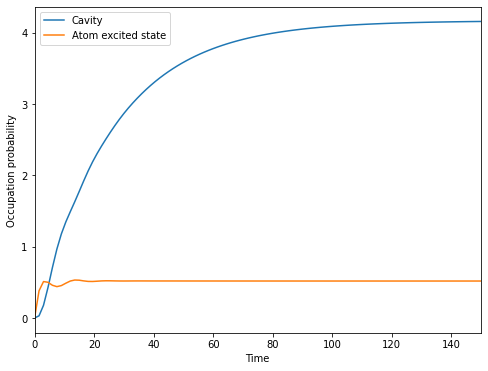

In [9]:
n_c = output.expect[0]
n_a = output.expect[1]

fig, axes = plt.subplots(1, 1, figsize=(8,6))

axes.plot(tlist, n_c, label="Cavity")
axes.plot(tlist, n_a, label="Atom excited state")
axes.set_xlim(0, 150)
axes.legend(loc=0)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability');

## Steady state: cavity fock-state distribution and wigner function

In [10]:
rho_ss = steadystate(H, c_ops)

In [14]:
import matplotlib

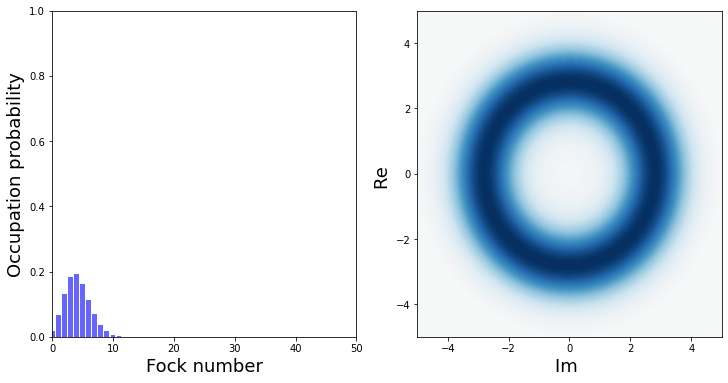

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12,6))

xvec = linspace(-5,5,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()

axes[1].contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im ', fontsize=18)
axes[1].set_ylabel(r'Re ', fontsize=18)

axes[0].bar(arange(0, N), real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N)
axes[0].set_xlabel('Fock number', fontsize=18)
axes[0].set_ylabel('Occupation probability', fontsize=18);

## Cavity fock-state distribution and Wigner function as a function of time

In [17]:
tlist = linspace(0, 25, 5)
output = mesolve(H, psi0, tlist, c_ops, [], options=Odeoptions(nsteps=5000))
     



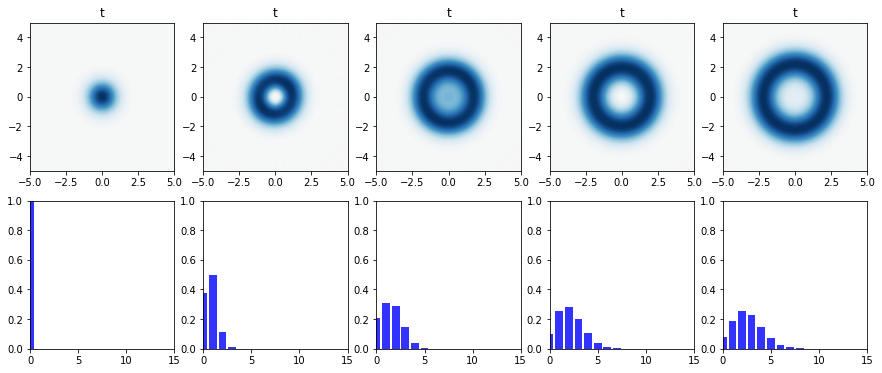

In [18]:
rho_ss_sublist = output.states

xvec = linspace(-5,5,200)

fig, axes = plt.subplots(2, len(rho_ss_sublist), figsize=(3*len(rho_ss_sublist), 6))

for idx, rho_ss in enumerate(rho_ss_sublist):

    # trace out the cavity density matrix
    rho_ss_cavity = ptrace(rho_ss, 0)
    
    # calculate its wigner function
    W = wigner(rho_ss_cavity, xvec, xvec)
    
    # plot its wigner function
    wlim = abs(W).max()
    axes[0,idx].contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
    axes[0,idx].set_title(r't' % tlist[idx])
    
    # plot its fock-state distribution
    axes[1,idx].bar(arange(0, N), real(rho_ss_cavity.diag()), color="blue", alpha=0.8)
    axes[1,idx].set_ylim(0, 1)
    axes[1,idx].set_xlim(0, 15)

## Steady state average photon occupation in cavity as a function of pump rate

In [19]:
def calulcate_avg_photons(N, Gamma):
       
    # collapse operators
    c_ops = []

    rate = kappa * (1 + n_th_a)
    if rate > 0.0:
        c_ops.append(sqrt(rate) * a)

    rate = kappa * n_th_a
    if rate > 0.0:
        c_ops.append(sqrt(rate) * a.dag())

    rate = gamma
    if rate > 0.0:
        c_ops.append(sqrt(rate) * sm)

    rate = Gamma
    if rate > 0.0:
        c_ops.append(sqrt(rate) * sm.dag())
      
    # Ground state and steady state for the Hamiltonian: H = H0 + g * H1
    rho_ss = steadystate(H, c_ops)
    
    # cavity photon number
    n_cavity = expect(a.dag() * a, rho_ss)
    
    # cavity second order coherence function
    g2_cavity = expect(a.dag() * a.dag() * a * a, rho_ss) / (n_cavity ** 2)

    return n_cavity, g2_cavity

In [20]:
Gamma_max = 2 * (4*g**2) / kappa
Gamma_vec = linspace(0.1, Gamma_max, 50)

n_avg_vec = []
g2_vec = []

for Gamma in Gamma_vec:
    n_avg, g2 = calulcate_avg_photons(N, Gamma)
    n_avg_vec.append(n_avg)
    g2_vec.append(g2)

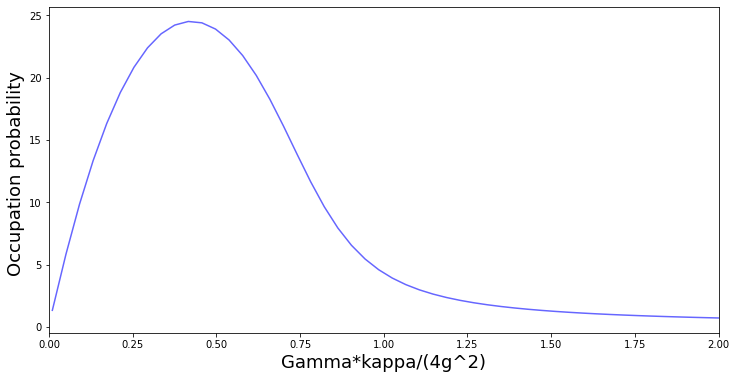

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

axes.plot(Gamma_vec * kappa / (4*g**2), n_avg_vec, color="blue", alpha=0.6, label="numerical")

axes.set_xlabel(r'Gamma*kappa/(4g^2)', fontsize=18)
axes.set_ylabel(r'Occupation probability ', fontsize=18)
axes.set_xlim(0, 2);

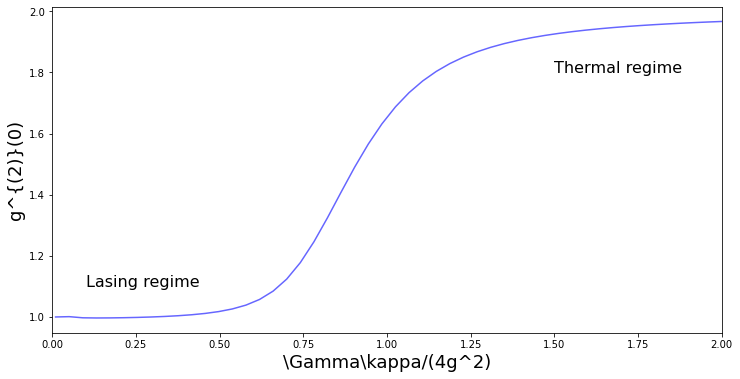

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12,6))

axes.plot(Gamma_vec * kappa / (4*g**2), g2_vec, color="blue", alpha=0.6, label="numerical")

axes.set_xlabel(r'\Gamma\kappa/(4g^2)', fontsize=18)
axes.set_ylabel(r'g^{(2)}(0)', fontsize=18)
axes.set_xlim(0, 2)
axes.text(0.1, 1.1, "Lasing regime", fontsize=16)
axes.text(1.5, 1.8, "Thermal regime", fontsize=16);
     

Here we see that lasing is suppressed for $\Gamma\kappa/(4g^2) > 1$
.

Let's look at the fock-state distribution at $\Gamma\kappa/(4g^2) = 0.5$
 (lasing regime) and $\Gamma\kappa/(4g^2) = 1.5$
 (suppressed regime):

## Case 1 : $\Gamma\kappa/(4g^2) = 0.5$

In [23]:
Gamma = 0.5 * (4*g**2) / kappa

In [24]:
c_ops = [sqrt(kappa * (1 + n_th_a)) * a, sqrt(kappa * n_th_a) * a.dag(), sqrt(gamma) * sm, sqrt(Gamma) * sm.dag()]

rho_ss = steadystate(H, c_ops)

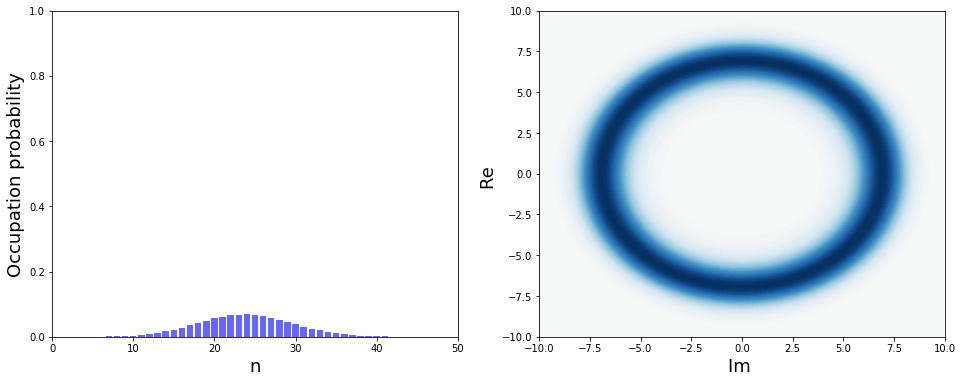

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

xvec = linspace(-10,10,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im ', fontsize=18)
axes[1].set_ylabel(r'Re ', fontsize=18)

axes[0].bar(arange(0, N), real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_xlabel(r'n', fontsize=18)
axes[0].set_ylabel(r'Occupation probability', fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);

## Case 2 : $ \Gamma\kappa/(4g^2) = 1.5$


In [26]:
Gamma = 1.5 * (4*g**2) / kappa

In [27]:
c_ops = [sqrt(kappa * (1 + n_th_a)) * a, sqrt(kappa * n_th_a) * a.dag(), sqrt(gamma) * sm, sqrt(Gamma) * sm.dag()]

rho_ss = steadystate(H, c_ops)


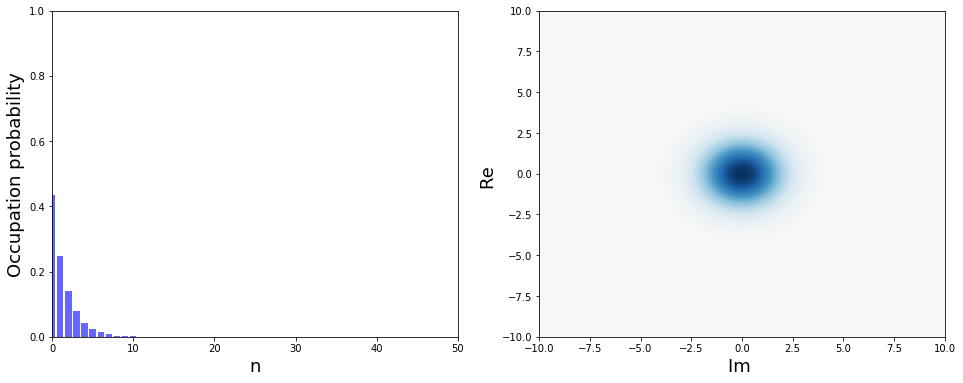

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(16,6))

xvec = linspace(-10,10,200)

rho_cavity = ptrace(rho_ss, 0)
W = wigner(rho_cavity, xvec, xvec)
wlim = abs(W).max()
axes[1].contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-wlim,wlim), cmap=plt.get_cmap('RdBu'))
axes[1].set_xlabel(r'Im ', fontsize=18)
axes[1].set_ylabel(r'Re ', fontsize=18)

axes[0].bar(arange(0, N), real(rho_cavity.diag()), color="blue", alpha=0.6)
axes[0].set_xlabel(r'n', fontsize=18)
axes[0].set_ylabel(r'Occupation probability', fontsize=18)
axes[0].set_ylim(0, 1)
axes[0].set_xlim(0, N);

Too large pumping rate $\Gamma$
 kills the lasing process: reversed threshold.

##  Software Version

In [29]:
from qutip.ipynbtools import version_table

version_table()
     

Software,Version
QuTiP,4.7.1
Numpy,1.21.6
SciPy,1.7.3
matplotlib,3.2.2
Cython,0.29.33
Number of CPUs,2
BLAS Info,OPENBLAS
IPython,7.9.0
Python,"3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]"
OS,posix [linux]
